# Analisis kali ini dilakukan terhadap data penerbangan US pada tahun 2008. Prosedur analisis sebagai berikut
1. Load library yang dibutuhkan
2. Import Data
3. Data Exploration
4. Predictive Modeling



# 1. Load library

In [57]:
#load library
library(dplyr)
library(ggplot2)

# 2. Import Data 

In [58]:
#Import data
data=read.csv("../input/2008.csv")
#Menampilkan 6 data pertama
head(data[,1:15],15)
head(data[,16:ncol(data)],15)
dim(data)

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>
2008,1,3,4,2003,1955,2211,2225,WN,335,N712SW,128,150,116,-14
2008,1,3,4,754,735,1002,1000,WN,3231,N772SW,128,145,113,2
2008,1,3,4,628,620,804,750,WN,448,N428WN,96,90,76,14
2008,1,3,4,926,930,1054,1100,WN,1746,N612SW,88,90,78,-6
2008,1,3,4,1829,1755,1959,1925,WN,3920,N464WN,90,90,77,34
2008,1,3,4,1940,1915,2121,2110,WN,378,N726SW,101,115,87,11
2008,1,3,4,1937,1830,2037,1940,WN,509,N763SW,240,250,230,57
2008,1,3,4,1039,1040,1132,1150,WN,535,N428WN,233,250,219,-18
2008,1,3,4,617,615,652,650,WN,11,N689SW,95,95,70,2


DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>
8,IAD,TPA,810,4,8,0,,0,NA,NA,NA,NA,NA
19,IAD,TPA,810,5,10,0,,0,NA,NA,NA,NA,NA
8,IND,BWI,515,3,17,0,,0,NA,NA,NA,NA,NA
-4,IND,BWI,515,3,7,0,,0,NA,NA,NA,NA,NA
34,IND,BWI,515,3,10,0,,0,2,0,0,0,32
25,IND,JAX,688,4,10,0,,0,NA,NA,NA,NA,NA
67,IND,LAS,1591,3,7,0,,0,10,0,0,0,47
-1,IND,LAS,1591,7,7,0,,0,NA,NA,NA,NA,NA
2,IND,MCI,451,6,19,0,,0,NA,NA,NA,NA,NA


[1] 7009728      29

# 3. Data Exploration

### 3.1. Bandara manakah yang memiliki pemesanan terbanyak?

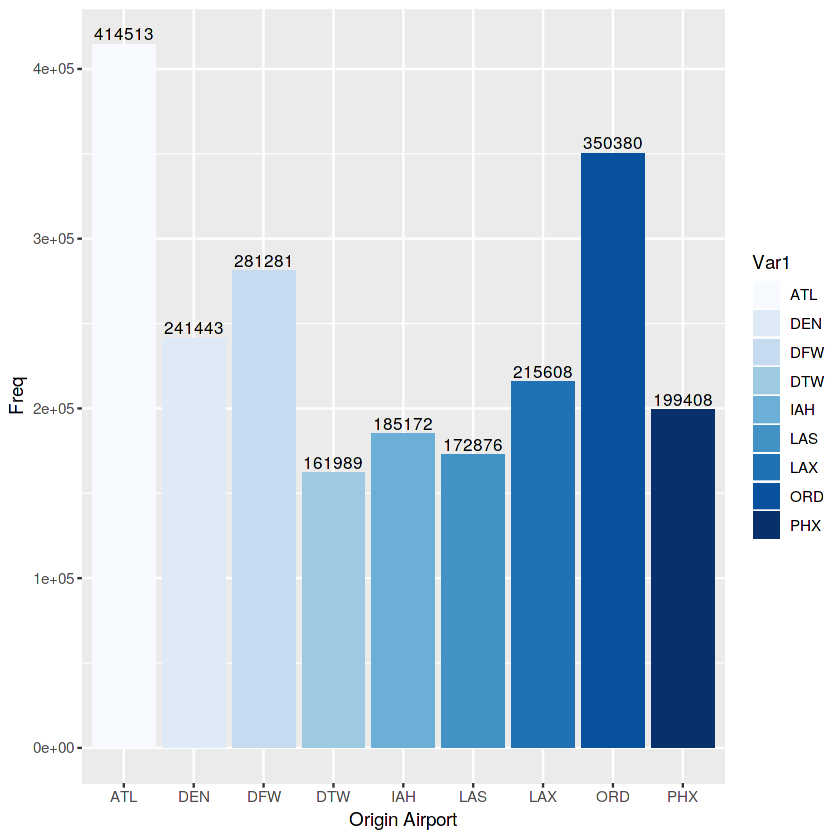

In [59]:
origin=as.data.frame(table(data$Origin))
origin1=origin[order(origin$Freq, decreasing = TRUE),]
origin1=origin1[1:9,]

p<-ggplot(data=origin1, aes(x = Var1, fill=Var1, y = Freq)) +scale_fill_brewer()+
  geom_bar(stat="identity")+geom_text(aes(label=Freq), vjust=-0.3, size=3.5)+
  scale_x_discrete(name ="Origin Airport")
p

#### Diatas ditampilkan 9 bandara dg flight terbanyak. Urutan pertama adalah bandara ATL, disusul oleh ORD, DFW, dan seterusnya. Sedangkan yang paling rendah adalah PHX

### 3.2. Bulan apa saja penerbangan terbanyak?

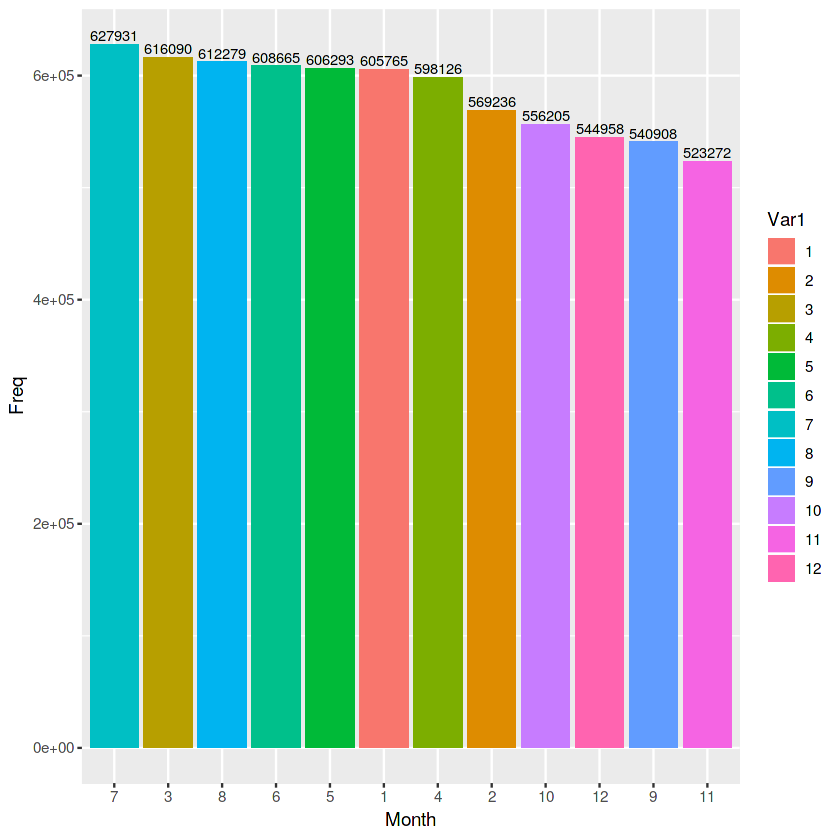

In [60]:
month=as.data.frame(table(data$Month))
month1=month[order(month$Freq, decreasing = TRUE),]

q<-ggplot(data=month1, aes(x = reorder(Var1, -Freq), y = Freq, fill=Var1)) +
  geom_bar(stat="identity")+geom_text(aes(label=Freq), vjust=-0.3, size=3)+
  scale_x_discrete(name ="Month")
q

#### Dapat dilihat bahwa bulan Juli merupakan bulan yang memiliki paling banyak pesanan. Diikuti oleh bulan 3, bulan 8, dst. sedangkan bulan 11 adalah bulan dengan pemesanan paling terendah. Namun jika dilihat dengan seksama, tidak ada perbedaan yang bgtu signifikan. Umumnya Penerbangan berada diatas 520rb pemesanan

### 3.3. Alasan cancel

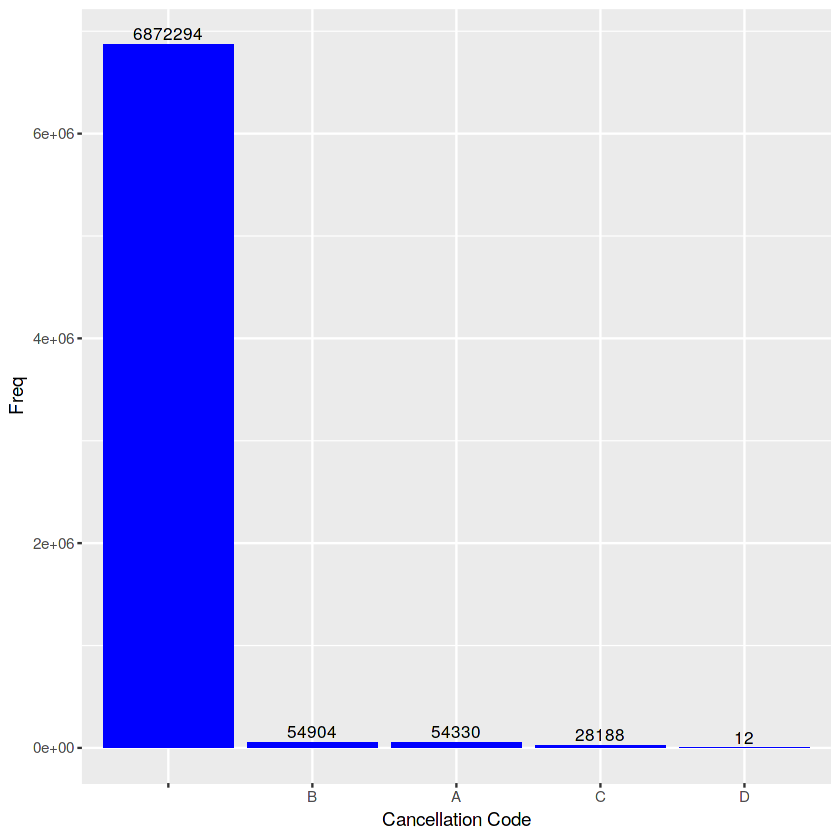

In [61]:
ca=as.data.frame(table(data$CancellationCode))
ca1=ca[order(ca$Freq, decreasing = TRUE),]

r<-ggplot(data=ca1, aes(x = reorder(Var1, -Freq), y = Freq)) +
  geom_bar(stat="identity", fill='blue')+geom_text(aes(label=Freq), vjust=-0.3, size=3.5)+
  scale_x_discrete(name ="Cancellation Code")
r

#### Jika Code ' ' dipandang sebagai alasan cancel, berarti alasan tertinggi adalah ' '. Jika Code ' ' diabaikan, maka alasan cancel paling banyak adalah Code B dan Code A

# 4. Predictive Modeling
## Akan diprediksi berapa menit akan delay.
### Yang digunakan adalah delay departure >= 0

In [62]:
data.new=data[ which(data$DepDelay >= 0),]
head(data.new[,1:15])
head(data.new[,16:ncol(data.new)])

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>
1,2008,1,3,4,2003,1955,2211,2225,WN,335,N712SW,128,150,116,-14
2,2008,1,3,4,754,735,1002,1000,WN,3231,N772SW,128,145,113,2
3,2008,1,3,4,628,620,804,750,WN,448,N428WN,96,90,76,14
5,2008,1,3,4,1829,1755,1959,1925,WN,3920,N464WN,90,90,77,34
6,2008,1,3,4,1940,1915,2121,2110,WN,378,N726SW,101,115,87,11
7,2008,1,3,4,1937,1830,2037,1940,WN,509,N763SW,240,250,230,57


,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>
1,8,IAD,TPA,810,4,8,0,,0,NA,NA,NA,NA,NA
2,19,IAD,TPA,810,5,10,0,,0,NA,NA,NA,NA,NA
3,8,IND,BWI,515,3,17,0,,0,NA,NA,NA,NA,NA
5,34,IND,BWI,515,3,10,0,,0,2,0,0,0,32
6,25,IND,JAX,688,4,10,0,,0,NA,NA,NA,NA,NA
7,67,IND,LAS,1591,3,7,0,,0,10,0,0,0,47


#### Mengambil variable numeric saja utk pemodelan

In [63]:
data.new2=dplyr::select_if(data.new, is.numeric)
str(data.new2)
#memeriksa missing value
colSums(is.na(data.new2))

'data.frame':	3231406 obs. of  24 variables:
 $ Year             : int  2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 ...
 $ Month            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ DayofMonth       : int  3 3 3 3 3 3 3 3 3 3 ...
 $ DayOfWeek        : int  4 4 4 4 4 4 4 4 4 4 ...
 $ DepTime          : int  2003 754 628 1829 1940 1937 617 1620 706 1644 ...
 $ CRSDepTime       : int  1955 735 620 1755 1915 1830 615 1620 700 1510 ...
 $ ArrTime          : int  2211 1002 804 1959 2121 2037 652 1639 916 1845 ...
 $ CRSArrTime       : int  2225 1000 750 1925 2110 1940 650 1655 915 1725 ...
 $ FlightNum        : int  335 3231 448 3920 378 509 11 810 100 1333 ...
 $ ActualElapsedTime: int  128 128 96 90 101 240 95 79 130 121 ...
 $ CRSElapsedTime   : int  150 145 90 90 115 250 95 95 135 135 ...
 $ AirTime          : int  116 113 76 77 87 230 70 70 106 107 ...
 $ ArrDelay         : int  -14 2 14 34 11 57 2 -16 1 80 ...
 $ DepDelay         : int  8 19 8 34 25 67 2 0 6 94 ...
 $ Distance         : 

Year             Month        DayofMonth         DayOfWeek 
                0                 0                 0                 0 
          DepTime        CRSDepTime           ArrTime        CRSArrTime 
                0                 0             10056                 0 
        FlightNum ActualElapsedTime    CRSElapsedTime           AirTime 
                0             11856               277             11856 
         ArrDelay          DepDelay          Distance            TaxiIn 
            11856                 0                 0             10056 
          TaxiOut         Cancelled          Diverted      CarrierDelay 
              542                 0                 0           1867480 
     WeatherDelay          NASDelay     SecurityDelay LateAircraftDelay 
          1867480           1867480           1867480           1867480

#### Membuang Missing value berdasarkan variable CarrierDelay

In [68]:
data.new3<-subset(data.new2, (!is.na(data.new2$CarrierDelay)))
dim(data.new3)
colSums(is.na(data.new3))
data.model=data.new3[,-c(1,2,3,4,14)]
data.model$y=data.new3[,14]
str(data.model)


[1] 1363926      24

Year             Month        DayofMonth         DayOfWeek 
                0                 0                 0                 0 
          DepTime        CRSDepTime           ArrTime        CRSArrTime 
                0                 0                 0                 0 
        FlightNum ActualElapsedTime    CRSElapsedTime           AirTime 
                0                 0                 0                 0 
         ArrDelay          DepDelay          Distance            TaxiIn 
                0                 0                 0                 0 
          TaxiOut         Cancelled          Diverted      CarrierDelay 
                0                 0                 0                 0 
     WeatherDelay          NASDelay     SecurityDelay LateAircraftDelay 
                0                 0                 0                 0

'data.frame':	1363926 obs. of  20 variables:
 $ DepTime          : int  1829 1937 1644 1452 1323 1416 1657 1422 2107 1812 ...
 $ CRSDepTime       : int  1755 1830 1510 1425 1255 1325 1625 1255 1945 1650 ...
 $ ArrTime          : int  1959 2037 1845 1640 1526 1512 1754 1657 2334 1927 ...
 $ CRSArrTime       : int  1925 1940 1725 1625 1510 1435 1735 1610 2230 1815 ...
 $ FlightNum        : int  3920 509 1333 675 4 54 623 188 362 422 ...
 $ ActualElapsedTime: int  90 240 121 228 123 56 57 155 147 135 ...
 $ CRSElapsedTime   : int  90 250 135 240 135 70 70 195 165 145 ...
 $ AirTime          : int  77 230 107 213 110 49 47 143 134 118 ...
 $ ArrDelay         : int  34 57 80 15 16 37 19 47 64 72 ...
 $ Distance         : int  515 1591 828 1489 838 220 220 1093 972 765 ...
 $ TaxiIn           : int  3 3 6 7 4 2 5 6 6 6 ...
 $ TaxiOut          : int  10 7 8 8 9 5 5 6 7 11 ...
 $ Cancelled        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Diverted         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CarrierDelay 

## Pemodelan menggunakan Regresi LASSO dengan Cross validation 5 folds.
### Regresi LASSO digunakan agar memudahkan dalam seleksi variabel yang tidak signifikan serta membuang variabel yang mengandung multikolinearitas

In [69]:
#acak data
set.seed(1001)
data=data.model[sample(1:nrow(data.model)),]

k=5
set.seed(1001)
data$lipat=cut(seq(1,nrow(data)),breaks = k,labels = FALSE)
names(data)
table(data$lipat)
hasil=NULL
for (i in 1:k) {
  train=data[data$lipat!=i,]
  test=data[data$lipat==i,]
  #lambda
  CV=cv.glmnet(x=as.matrix(train[,1:(ncol(train)-2)]), y=train$y,
               nlambda=100, alpha=1)
  #lasso dg lambda minimum
  fit=glmnet(x=as.matrix(train[,1:(ncol(train)-2)]), y=train$y, 
             lambda = CV$lambda.min, alpha = 1)
  #prediksi Y duga
  lasso.pred=predict(fit, newx = as.matrix(test[,1:(ncol(test)-2)]))
  #RMSEP
  mse=mean((lasso.pred-test$y)^2)
  #korelasi Y dg Y duga
  korelasi=cor(lasso.pred,test$y)
  
  p=data.frame(mse=mse,korelasi=korelasi)
  hasil=rbind(hasil,p)
}
mse=mean(hasil$mse)
korelasi=mean(hasil$korelasi)


[1] "DepTime"           "CRSDepTime"        "ArrTime"          
 [4] "CRSArrTime"        "FlightNum"         "ActualElapsedTime"
 [7] "CRSElapsedTime"    "AirTime"           "ArrDelay"         
[10] "Distance"          "TaxiIn"            "TaxiOut"          
[13] "Cancelled"         "Diverted"          "CarrierDelay"     
[16] "WeatherDelay"      "NASDelay"          "SecurityDelay"    
[19] "LateAircraftDelay" "y"                 "lipat"


     1      2      3      4      5 
272786 272785 272785 272785 272785 

#### Kriteria Kebaikan Model untuk Prediksi dengan MSE dan Korelasi

In [70]:
print(paste0("MSE     : ", mse))
print(paste0("Korelasi: ", korelasi))

[1] "MSE     : 2.83739395261515"
[1] "Korelasi: 0.999635489749073"


#### Dari hasil dapat dilihat MSE bernilai 2.84,  merupakan nilai error yang kecil. Serta Korelasi antara nilai aktual dengan prediksi yang tinggi 0.99 . Dengan Demikian Model ini bagus digunakan untuk memprediksi berapa menit delay keberangkatan pesawat

### Selanjutnya akan dilihat Variabel mana saja yang signifikan terhadap model

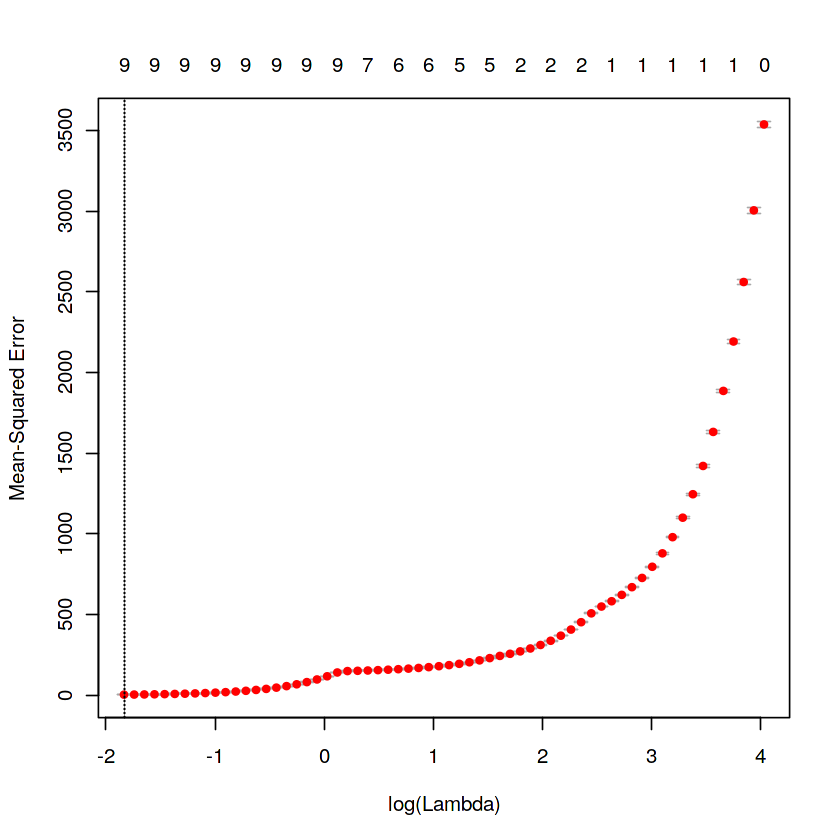

In [71]:
#regresi lasso#
library(glmnet)
set.seed(1001)

#mencari lambda
CV=cv.glmnet(x=as.matrix(data.model[,-ncol(data.model)]), y=data.model$y,
             nlambda=100, alpha=1)
plot(CV)

#lasso dg lambda minimum
fit=glmnet(x=as.matrix(data.model[,-ncol(data.model)]), y=data.model$y, 
           lambda = CV$lambda.min, alpha = 1)


In [72]:
tmp_coeffs <- coef(fit, s = "lambda.min")
varfix=data.frame(name = tmp_coeffs@Dimnames[[1]][tmp_coeffs@i + 1], coefficient = tmp_coeffs@x)
varfix

name,coefficient
<fct>,<dbl>
(Intercept),1.8459016761
DepTime,0.0001839566
ActualElapsedTime,-0.8616692995
CRSElapsedTime,0.8617036044
ArrDelay,0.9947821767
TaxiIn,-0.0747279372
TaxiOut,-0.0942475404
CarrierDelay,0.0033710878
NASDelay,-0.0085928840


#### Variable2 tersebut adalah variable yang signifikan terhadap model serta tidak mengandung multikolinearitas